# Zadania do tematu "Regresja liniowa (i nie tylko)"

W tym Notebooku znajdują się zadania do tematu "Regresja liniowa (i nie tylko)", które mają na celu pokazać podstawy implementacji regresji przy użyciu biblioteki Scikit-Learn.

# Zbiór danych

Będziemy korzystać ze zbioru danych "Student Performance" dostępnego pod linkiem https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data. Jeżeli ktoś ma konto na Kaggle to może pobrać dane w postaci `.csv` z tej platformy, a w innym przypadku można pobrać odpowiedni plik `.csv` z repozytorium do kursu (w folderze z zadaniami `Tasks` jest podfolder `dane`, a w nim plik `Student_Performance.csv`).

Jak zaznacza autor, zbiór danych jest utworzony sztucznie i służy do celów ilustracyjnych, więc może nie odzwierciedlać rzeczywistości.

Opis poszczególnych kolumn:
- `Hours Studied`: Łączna liczba godzin spędzonych na nauce przez każdego ucznia.
- `Previous Scores`: Wyniki uzyskane przez uczniów w poprzednich testach.
- `Extracurricular Activities`: Czy uczeń uczestniczy w zajęciach pozalekcyjnych (Tak lub Nie).
- `Sleep Hours`: Średnia liczba godzin snu na dobę.
- `Sample Question Papers Practiced`: Liczba arkuszy z pytaniami ćwiczebnymi, które uczeń rozwiązał.

Wartość do predykcji:
- `Performance Index`: Wskaźnik ogólnej wydajności każdego ucznia. Wskaźnik ten odzwierciedla wyniki akademickie ucznia i jest zaokrąglony do najbliższej liczby całkowitej. Zakres wartości wskaźnika wynosi od 10 do 100, gdzie wyższe wartości oznaczają lepsze wyniki.

# 1. Wczytaj dane z pliku do postaci `pandas DataFrame`. Następnie wykorzystaj `head()`, żeby wyświetlić pierwsze 5 wierszy.

In [26]:
# Wpisz swój kod poniżej
import pandas as pd
import os

df = pd.read_csv(os.path.join('dane', 'Student_Performance.csv'))
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# 2. Wyświetl typy danych w każdej kolumnie oraz statystyki poszczególnych kolumn.

In [27]:
# Wpisz swój kod poniżej
print(df.describe())
print(df.info())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

Jak widzisz kolumna `Extracurricular Activities` przechowuje dane typu `object`. Nie jest to typ, który można wykorzystać do wrzucenia w model, więc musimy coś z tym zrobić.

# 3. Zamień dane w kolumnie `Extracurricular Activities` na typ liczbowy - wartość `"Yes"` powinna odpowiadać `1`, a `"No"` to `0`. Następnie ponownie sprawdź statystyki poszczególnych kolumn.

**Podpowiedź**: Możesz wykorzystać metodę `map`



In [28]:
# Wpisz swój kod poniżej
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, "No": 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


# 4. Podziel dane na zbiory treningowy, walidacyjny i testowy w stosunku 80:10:10. Wykorzystaj do tego funkcję `train_test_split` z biblioteki `scikit-learn` oraz użyj parametr `random_state=42` dla powtarzalności wyników i możliwości porównania rezultatów z innymi.

Podział danych jest konieczny, żeby mieć pewność, że model nie nauczy się dopasowywać nadmiarowo do danych treningowych - jest to znane jako overfitting. Po podzieleniu danych wykorzystujemy zbiór walidacyjny do sprawdzania jakie rezultaty otrzymujemy na innych danych niż te, które model widział, a na zbiorze testowym jest finalny wynik (w rzeczywistości zwykle nie ma dostępu do wartości predykcji na zbiorze testowym).

**Podpowiedź**: jako zbiór wartości `X` przyjmujemy nasz DataFrame bez kolumny `Performance Index`, bo ta kolumna jest wartością do predykcji `y`.

In [29]:
# Wpisz swój kod poniżej
from sklearn.model_selection import train_test_split
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Sprawdź statystyki poszczególnych kolumn i zobacz czy są one zbliżone do tych w całym zbiorze.

In [30]:
# Wpisz swój kod poniżej
print(X.describe())
print(X_train.describe())

       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  
count  10000.000000                      10000.000000  
mean       6.530600                          4.583300  
std        1.695863                          2.867348  
min        4.000000                          0.000000  
25%        5.000000                          2.000000  
50%        7.000000                       

# 5. Korzystając z danych treningowych, stwórz wykres zależności pomiędzy zmienną `Performance Index` - dostępna jako `y_train`, a liczbą godzin nauki (`Hours Studied`) - dostępna w `X_train`. Zobacz, jak liczba godzin nauki wpływa na wyniki.

**Podpowiedź**: Możesz użyć `matplotlib` lub `seaborn` do stworzenia wykresu punktowego (scatter plot).

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

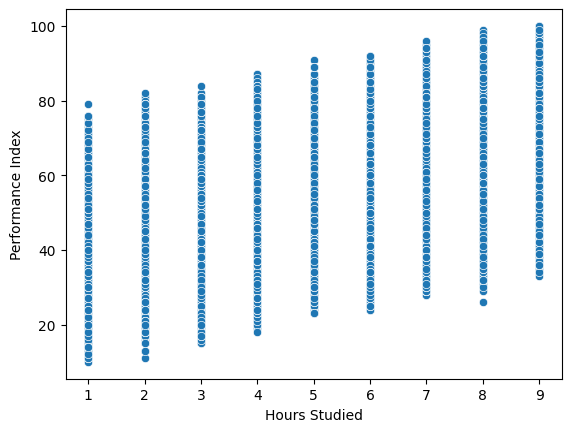

In [31]:
# Wpisz swój kod poniżej
import seaborn as sns

sns.scatterplot(X_train,x='Hours Studied',y=y_train)

# 6. Wykorzystaj szablon dostępny poniżej do wyświetlenia wielu wykresów, aby wyświetlić zależność `Performace Index` od danych z pozostałych kolumn. Zastanów się czy widać wpływ danej zmiennej na wartośc `Performance Index`.

Dokumentacja i przykłady dla `subplot` dostępne są [na stronie matplotlib](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html).

Text(0.5, 1.0, 'Zależność pomiędzy Sleep Hours i Performance Index')

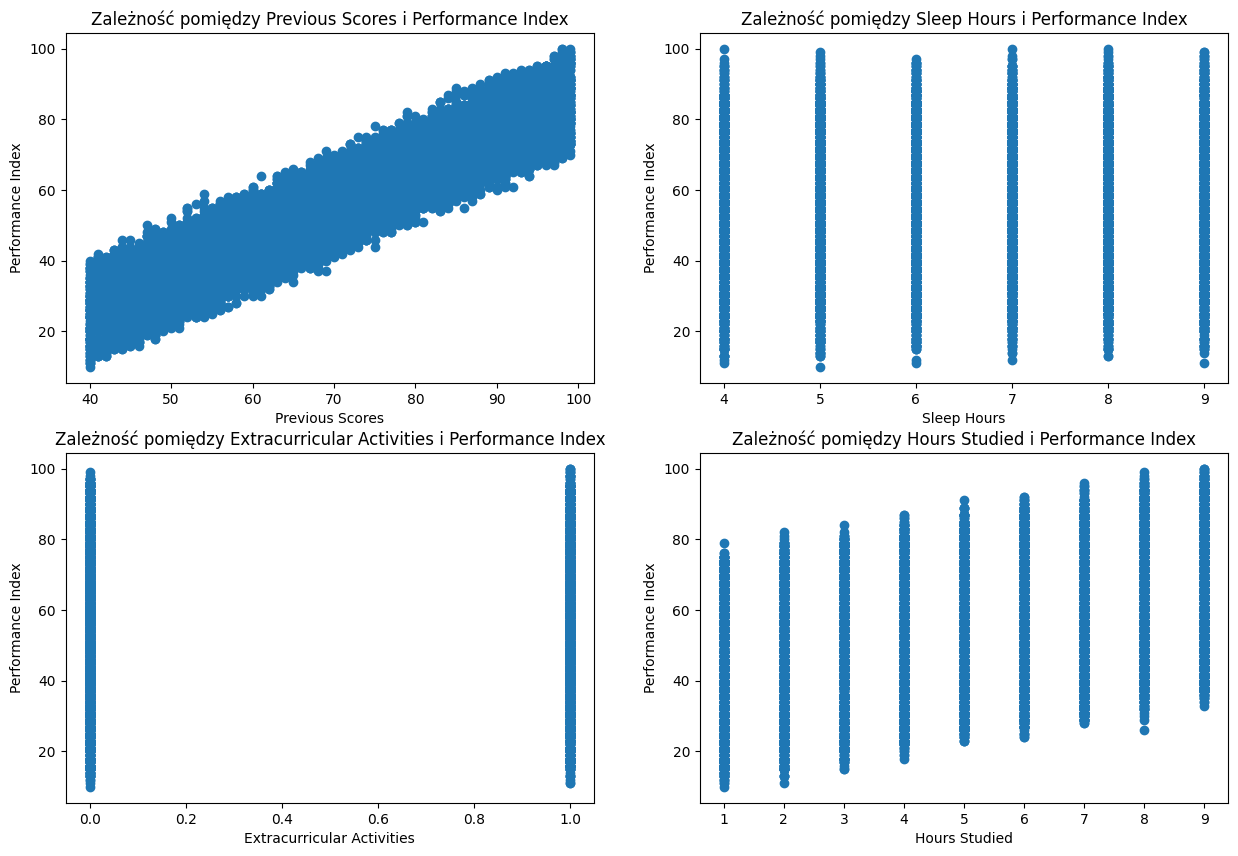

In [32]:
# Uzupełnij kod poniżej
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
## Przykład
axes[0, 0].plot(X_train['Previous Scores'], y_train, 'o')
axes[0, 0].set_xlabel('Previous Scores')
axes[0, 0].set_ylabel('Performance Index')
axes[0, 0].set_title('Zależność pomiędzy Previous Scores i Performance Index')

axes[1, 0].plot(X_train['Extracurricular Activities'], y_train, 'o')
axes[1, 0].set_xlabel('Extracurricular Activities')
axes[1, 0].set_ylabel('Performance Index')
axes[1, 0].set_title('Zależność pomiędzy Extracurricular Activities i Performance Index')

axes[1, 1].plot(X_train['Hours Studied'], y_train, 'o')
axes[1, 1].set_xlabel('Hours Studied')
axes[1, 1].set_ylabel('Performance Index')
axes[1, 1].set_title('Zależność pomiędzy Hours Studied i Performance Index')

axes[0, 1].plot(X_train['Sleep Hours'], y_train, 'o')
axes[0, 1].set_xlabel('Sleep Hours')
axes[0, 1].set_ylabel('Performance Index')
axes[0, 1].set_title('Zależność pomiędzy Sleep Hours i Performance Index')



# 7. Wykonaj prostą regresję liniową, wykorzystując poprzednie wyniki (`Previous Scores`) do przewidzenia zmiennej docelowej `Performance Index`. Skorzystaj z modelu `LinearRegression` z scikit-learn. Następnie sprawdź swój model na zbiorze walidacyjnym i wyświetl w formie wykresu wartości rzeczywiste i wartości przewidziane przez model (wykorzystaj do tego różne kolory).

**W nazwie modelu dodaj jakieś oznaczene jego typu (np. `model_lr`), bo w późniejszych zadaniach będziemy chcieli porównać różne modele**

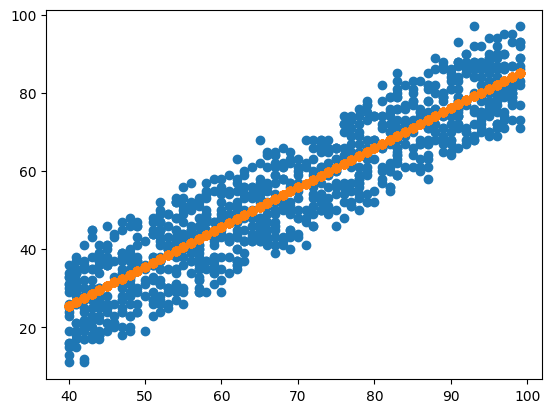

In [46]:
# Wpisz swój kod poniżej
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train[['Previous Scores']], y_train)  # Reshape to DataFrame
y_pred_lr = model_lr.predict(X_val[['Previous Scores']])  # Reshape to DataFrame

import matplotlib.pyplot as plt
plt.scatter(X_val['Previous Scores'], y_val)
plt.scatter(X_val['Previous Scores'], y_pred_lr)
plt.show()

# 8. Ponownie wykonaj regresję liniową, ale tym razem wykorzystaj model `DecisionTreeRegressor`. Wykorzystaj poprzednie wyniki (`Previous Scores`) do przewidzenia zmiennej docelowej `Performance Index`, a potem znowu zrób wykres w celu porównania.

**W nazwie modelu dodaj jakieś oznaczene jego typu (np. `model_dt`), bo w późniejszych zadaniach będziemy chcieli porównać różne modele**

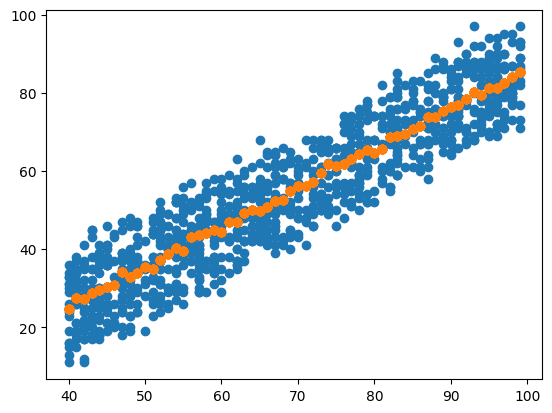

In [47]:
# Wpisz swój kod poniżej
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train[['Previous Scores']], y_train)

y_pred_dt = model_dt.predict(X_val[['Previous Scores']])


plt.scatter(X_val['Previous Scores'], y_val)
plt.scatter(X_val['Previous Scores'], y_pred_dt)
plt.show()

## Zbadaj, jak głębokość drzewa (parametr `max_depth`) wpływa na predykcję.

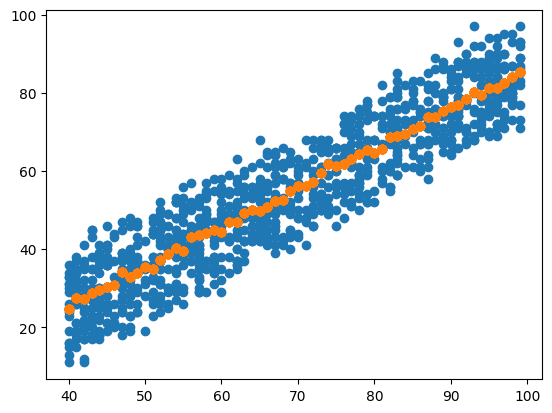

In [54]:
# Wpisz swój kod poniżej
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train[['Previous Scores']], y_train)

y_pred_dt = model_dt.predict(X_val[['Previous Scores']])


plt.scatter(X_val['Previous Scores'], y_val)
plt.scatter(X_val['Previous Scores'], y_pred_dt)
plt.show()

# 9. W tym zadaniu zaimplementuj regresję liniową bazując na modelu `RandomForestRegressor`. Wykorzystaj kolumnę z poprzednimi wynikami (`Previous Scores`) do przewidzenia zmiennej docelowej `Performance Index`, a potem jeszcze raz zrób wykres w celu porównania.

**W nazwie modelu dodaj jakieś oznaczene jego typu (np. `model_rf`), bo w późniejszych zadaniach będziemy chcieli porównać różne modele**

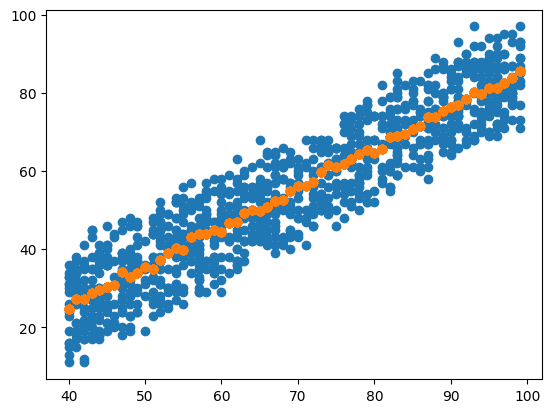

In [69]:
# Wpisz swój kod poniżej
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train[['Previous Scores']], y_train)
y_pred_rf = model_rf.predict(X_val[['Previous Scores']])

plt.scatter(X_val['Previous Scores'], y_val)
plt.scatter(X_val['Previous Scores'], y_pred_rf)
plt.show()

## Eksperymentuj z liczbą drzew (`n_estimators`) i sprawdź czy zmieniają się predykowane wartości.

In [ ]:
# Wpisz swój kod poniżej


# 10. Ostatni model, który dzisiaj poznamy wykorzystuje Support Vector Machine (SVM). Wykorzystaj model `SVR`, aby zaimplementować regresję liniową. Wykorzystaj kolumnę z poprzednimi wynikami (`Previous Scores`) do przewidzenia zmiennej docelowej `Performance Index`, a potem jeszcze raz zrób wykres w celu porównania.

**W nazwie modelu dodaj jakieś oznaczene jego typu (np. `model_svm`), bo w późniejszych zadaniach będziemy chcieli porównać różne modele**

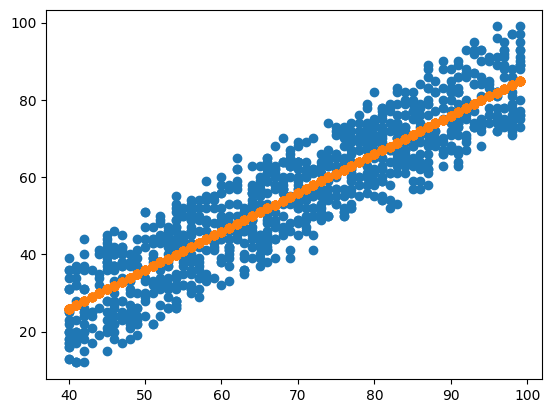

In [70]:
# Wpisz swój kod poniżej
from sklearn.svm import SVR
model_svm = SVR(kernel='linear')
model_svm.fit(X_train[['Previous Scores']], y_train)
y_pred_svm = model_svm.predict(X_test[['Previous Scores']])

plt.figure()
plt.scatter(X_test['Previous Scores'], y_test)
plt.scatter(X_test['Previous Scores'], y_pred_svm)
plt.show()

## Zbadaj, jak różne jądra (`kernel`) wpływają na predykcję.

Do wyboru są:
- liniowy (`linear`),
- wielomianowy (`poly`),
- RBF - funkcja bazowa radialna (`rbf`),
- sigmoidalny (`sigmoid`).

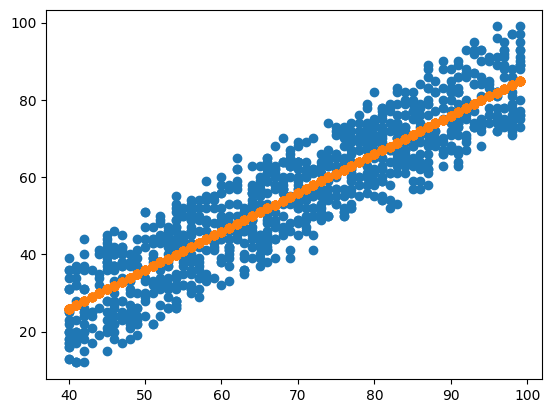

In [75]:
# Wpisz swój kod poniżej
# Wpisz swój kod poniżej
from sklearn.svm import SVR
model_svm = SVR(kernel='linear')
model_svm.fit(X_train[['Previous Scores']], y_train)
y_pred_svm = model_svm.predict(X_test[['Previous Scores']])

plt.figure()
plt.scatter(X_test['Previous Scores'], y_test)
plt.scatter(X_test['Previous Scores'], y_pred_svm)
plt.show()

# 11. Porównaj wyniki poszczególnych modeli na zbiorze testowym. Jako metrykę przyjmij błąd średnio-kwadratowy `mean_squared_error`. Który model uzyskał najlepszy wynik, a który najgorszy? Czy na podstawie przebiegów z poprzednich zadań można było się spodziewać takich wyników?

In [78]:
# Wpisz swój kod poniżej
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_val,y_pred_dt))
print(mean_squared_error(y_val,y_pred_lr))
print(mean_squared_error(y_val,y_pred_rf))
print(mean_squared_error(y_val,y_pred_svm))

58.29476642155643
57.68126626378968
58.27753823845742
651.1167999998838


In [79]:
models = [model_lr, model_dt, model_rf, model_svm]

for model in models:
    y_pred = model.predict(X_test[['Previous Scores']])
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: MSE = {mse}")

LinearRegression: MSE = 60.216853434649614
DecisionTreeRegressor: MSE = 60.68976005633593
RandomForestRegressor: MSE = 60.659453057959176
SVR: MSE = 60.283599999980375


# 12. Dotychczas wykorzystywaliśmy dane z zaledwie jednej kolumny. Utwórz 4 nowe modele (po jednym każdego typu), ale tym razem wykorzystaj cały zbiór treningowy podczas uczenia (`fit`). Następnie ponownie oblicz wartość błędu średnio-kwadratowego na zbiorze testowym i porównaj z wynikami z poprzedniego zadania. Czy wyniki są lepsze?

In [81]:
# Wpisz swój kod poniżej
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

model_dt2 = DecisionTreeRegressor(random_state=42)
model_dt2.fit(X_train, y_train)

model_rf2 = RandomForestRegressor(random_state=42)
model_rf2.fit(X_train, y_train)

model_svm2 = SVR(kernel='linear')
model_svm2.fit(X_train, y_train)

SVR(kernel='linear')

In [83]:
models2 = [model_lr2, model_dt2, model_rf2, model_svm2]

for model in models2:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: MSE = {mse}")

LinearRegression: MSE = 4.0059798102502695
DecisionTreeRegressor: MSE = 8.966388888888888
RandomForestRegressor: MSE = 5.119714228235559
SVR: MSE = 4.0089295443968505


# 13. Przetestuj czy jesteś w stanie utworzyć lepszy model - możesz sprawdzić różne wartości parametrów jak we wcześniejszych zadaniach lub różne kombinacje wykorzystywanych kolumn przy uczeniu modeli. Po zakończeniu prześlij najlepszy uzyskany wynik wraz z nazwami wykorzystanych kolumn i wartościami poszczególnych parametrów najlepszego modelu.

In [ ]:
# Wpisz swój kod poniżej
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

# Lista hiperparametrów
param_distributions = {
    'LinearRegression': {},
    'SVR': {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestRegressor': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

best_models = {}

# RandomizedSearchCV dla każdego modelu
for model_name in models.keys():
    print(f"Searching best parameters for {model_name}...")

    model = models[model_name]
    param_dist = param_distributions[model_name]

    # RandomizedSearchCV - wyszukiwanie optymalnych parametrów
    random_search = RandomizedSearchCV(
        model, param_distributions=param_dist,
        n_iter=10, scoring='neg_mean_squared_error', cv=2, verbose=1, random_state=42, n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    # Zapisz najlepszy model
    best_models[model_name] = random_search.best_estimator_

    # Predykcje i ocena na zbiorze testowym
    y_pred = best_models[model_name].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Best model for {model_name}: {random_search.best_params_}")
    print(f"MSE on test set: {mse}\n")

Searching best parameters for LinearRegression...
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/home/marcin/zadania_kurs_ml/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best model for LinearRegression: {}
MSE on test set: 4.0059798102502695

Searching best parameters for SVR...
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/marcin/zadania_kurs_ml/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best model for SVR: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 0.1}
MSE on test set: 4.009943932785003

Searching best parameters for DecisionTreeRegressor...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best model for DecisionTreeRegressor: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
MSE on test set: 6.289273480410683

Searching best parameters for RandomForestRegressor...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best model for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
MSE on test set: 4.682923003226557

